In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

print("Libraries imported successfully!")

Libraries imported successfully!


Download stock data

In [29]:
# Choosing a stock ticker
ticker = "TSM"

# Download 5 years of data
print(f"Downloding {ticker} data...")
data = yf.download(ticker, start="2021-01-01", end="2026-01-01")

# Flatten column names if multi-level
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.get_level_values(0)

print(f"Donwloaded {len(data)} days of data")
print(f"Date range: {data.index[0]} to {data.index[-1]}")

Downloding TSM data...


[*********************100%***********************]  1 of 1 completed

Donwloaded 1255 days of data
Date range: 2021-01-04 00:00:00 to 2025-12-31 00:00:00


In [30]:
print("First 5 rows:")
print(data.head())

print("\nLast 5 rows:")
print(data.tail())

print("\nData info:")
print(data.info())

First 5 rows:
Price            Close        High         Low        Open    Volume
Date                                                                
2021-01-04  102.714417  104.921353  101.564971  102.502923  11262100
2021-01-05  103.698334  105.702966  102.999476  103.367300  10583600
2021-01-06  106.309883  107.027136  103.496044  104.691462  10609300
2021-01-07  111.661674  113.050206  108.130576  109.739799  13556100
2021-01-08  109.142120  116.130746  107.569680  115.781317  18976800

Last 5 rows:
Price            Close        High         Low        Open   Volume
Date                                                               
2025-12-24  298.799988  299.160004  296.230011  297.739990  2753900
2025-12-26  302.839996  303.380005  298.519989  299.899994  5125900
2025-12-29  300.920013  304.500000  298.649994  301.779999  6205100
2025-12-30  299.579987  304.549988  299.450012  302.359985  6190600
2025-12-31  303.890015  307.390015  303.429993  304.000000  8175100

Data info:
<

Save the data

In [31]:
data.to_csv(f'../data/{ticker}_historical.csv')
print(f"Data saved to data/{ticker}_historical.csv")

Data saved to data/TSM_historical.csv


First Visualization

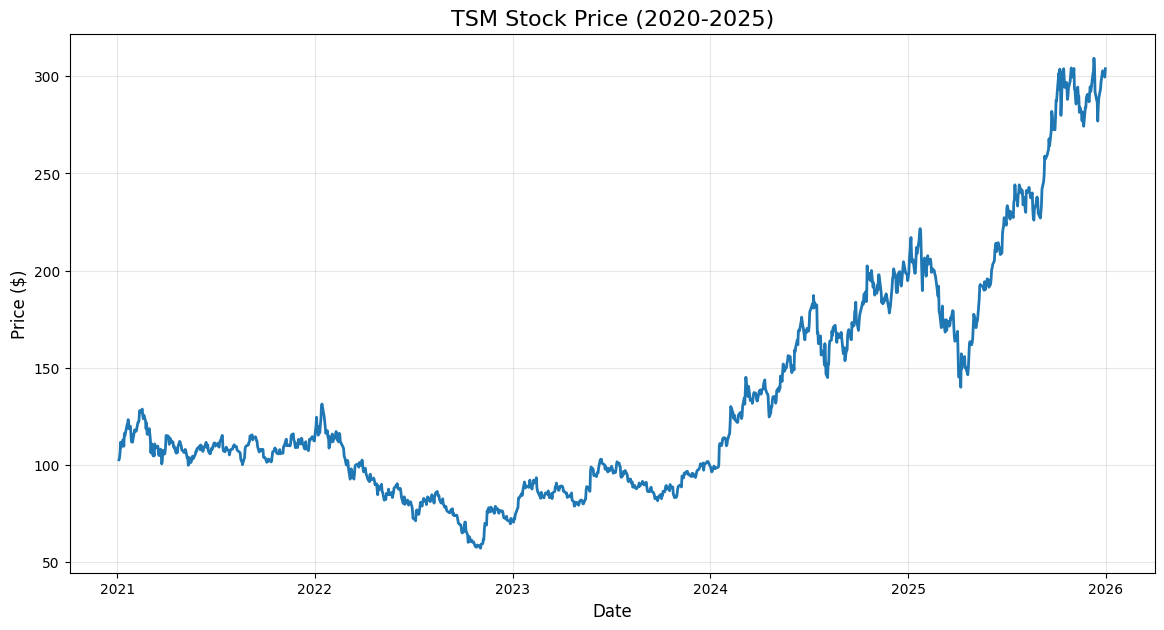

In [32]:
# Plot the closing price over time
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], linewidth=2)
plt.title(f'{ticker} Stock Price (2020-2025)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

## Statistics

In [33]:
print("Basic Statistics:")
print("="*50)
print(f"Starting price: ${data['Close'].iloc[0]:.2f}")
print(f"Ending price: ${data['Close'].iloc[-1]:.2f}")
print(f"Highest price: ${data['Close'].max():.2f}")
print(f"Lowest price: ${data['Close'].min():.2f}")
print(f"Average price: ${data['Close'].mean():.2f}")
print(f"Total return: {((data['Close'].iloc[-1] / data['Close'].iloc[0]) - 1) * 100:.2f}%")

Basic Statistics:
Starting price: $102.71
Ending price: $303.89
Highest price: $309.31
Lowest price: $57.21
Average price: $134.22
Total return: 195.86%


In [34]:
# Daily returns (percentage change)
data['Daily_Return'] = data['Close'].pct_change()

print("Daily returns calculated!")
print(f"Average daily return: {data['Daily_Return'].mean()*100:.3f}%")
print(f"Daily volatility: {data['Daily_Return'].std()*100:.3f}%")

Daily returns calculated!
Average daily return: 0.114%
Daily volatility: 2.354%


## Visualizing Returns

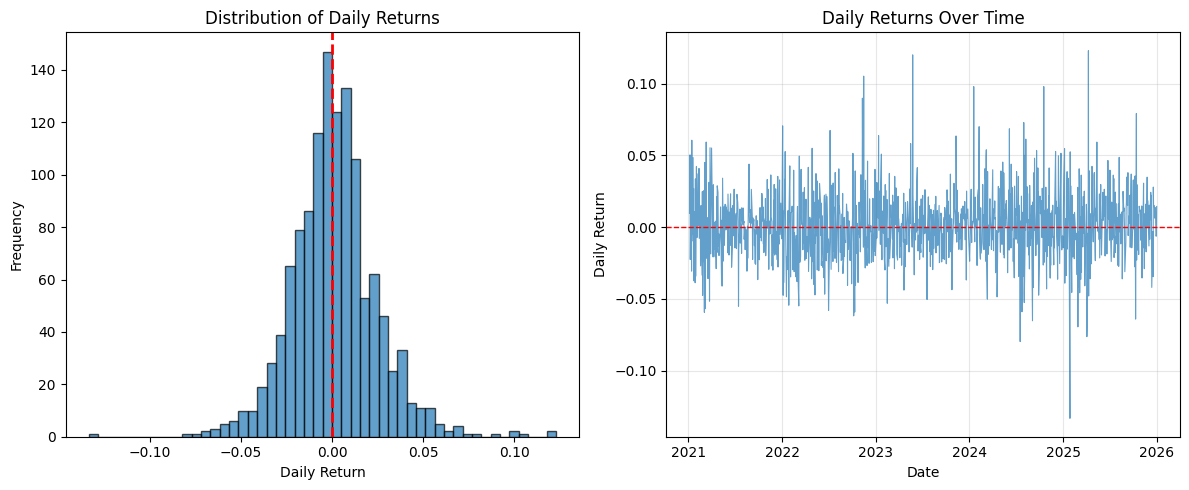

In [35]:
# PLot distributions of daily returns
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(data['Daily_Return'].dropna(), bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)

# Returns over time
plt.subplot(1, 2, 2)
plt.plot(data.index, data['Daily_Return'], linewidth=0.8, alpha=0.7)
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

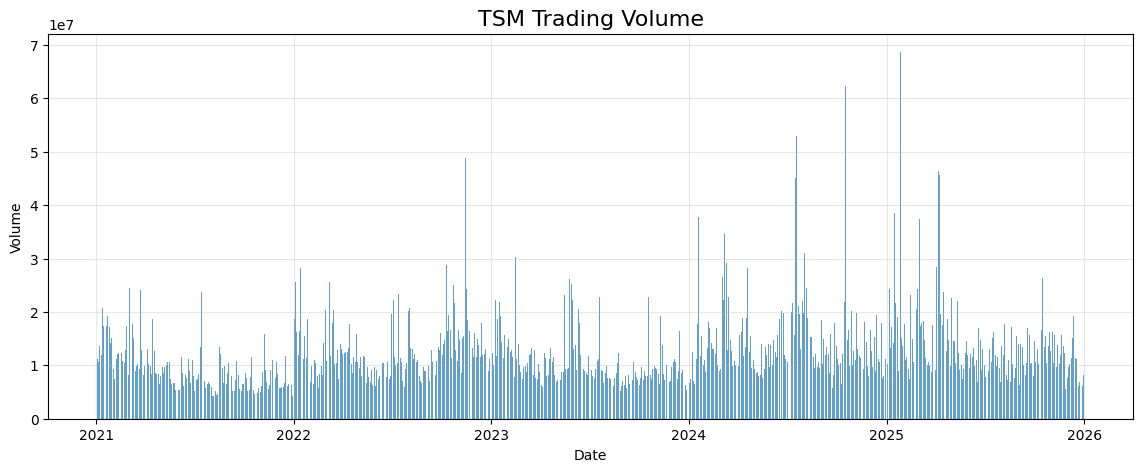

In [36]:
plt.figure(figsize=(14, 5))
plt.bar(data.index, data['Volume'], width=1, alpha=0.7)
plt.title(f'{ticker} Trading Volume', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True, alpha=0.3)
plt.show()